Análise de dados sobre Microdados do ENEM 2023 - SP
. 

* Como a desigualdade impacta na educação de SP. Irei analisar : Raça, Renda e Moradia : Rural / Urbana. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados_brutos = pd.read_excel("enem2023spfinal.xlsx")
display(dados_brutos)


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059516733,2023,3,F,1,2,1,3,0,1,...,B,A,A,B,A,A,C,A,A,B
1,210059394093,2023,3,M,1,4,1,1,3,1,...,B,A,A,B,A,A,E,A,A,B
2,210058984747,2023,3,F,1,3,1,1,5,1,...,A,A,A,A,A,A,B,A,A,B
3,210060960228,2023,4,M,1,2,1,3,0,1,...,A,A,A,A,A,A,B,A,B,B
4,210058435730,2023,2,F,0,1,1,1,1,1,...,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138308,210058439647,2023,2,F,1,2,1,1,1,1,...,B,A,B,C,B,A,D,A,D,B
138309,210060515445,2023,2,M,1,3,1,1,6,1,...,B,A,A,A,A,A,C,A,B,B
138310,210059454703,2023,3,M,1,1,1,1,1,1,...,B,A,A,B,A,B,C,A,B,B
138311,210061337518,2023,3,F,1,2,1,1,0,1,...,B,A,A,B,A,A,C,A,A,A


limpeza dos dados

In [7]:
# encontrando forma de uma array
dados_brutos.shape

(138313, 76)

Eliminando dados dos candidatos que zeraram na redação e que faltaram algum dia na prova. 

In [8]:
dados = dados_brutos
selecao = dados['NU_NOTA_REDACAO'].isnull() == False
dados = dados[selecao]
selecao = dados["TP_PRESENCA_CN"] != 0
dados = dados[selecao]
selecao = dados["TP_PRESENCA_MT"] != 0
dados = dados[selecao]
selecao = dados["TP_PRESENCA_CH"] != 0
dados = dados[selecao]
selecao = dados["TP_PRESENCA_LC"] != 0
dados = dados[selecao]
dados.shape

(102614, 76)

Limpando dados de candidatos treineiros (pessoas que não concluiram o ensino medio e estão fazendo teste)

In [9]:
selecao = dados['IN_TREINEIRO'] == 0
dados = dados[selecao]
dados.shape

(87052, 76)

Materias e add a soma da nota

In [10]:
dados['NU_NOTA_SOMA'] = (dados['NU_NOTA_MT'] + dados['NU_NOTA_CH'] + dados['NU_NOTA_CN'] + dados['NU_NOTA_LC'] + dados['NU_NOTA_REDACAO'])
dados['NU_NOTA_SOMA']

1         2075.5
2         2175.4
4         2735.8
5         2474.5
6         2054.0
           ...  
138304    2779.2
138305    2362.5
138307    2684.6
138309    2327.6
138310    2630.9
Name: NU_NOTA_SOMA, Length: 87052, dtype: float64

In [11]:
selecao = dados['NU_NOTA_MT'].isnull() == False
dados = dados[selecao]
selecao = dados["NU_NOTA_SOMA"] > 0
dados = dados[selecao]

descricoes = pd.DataFrame(dados['NU_NOTA_MT'].describe().round(2))
descricoes['Ciencias Humanas'] = dados['NU_NOTA_CH'].describe().round(2)
descricoes['Ciencias da Natureza'] = dados['NU_NOTA_CN'].describe().round(2)
descricoes['Linguagens e Códigos'] = dados['NU_NOTA_LC'].describe().round(2)
descricoes['Redacao'] = dados['NU_NOTA_REDACAO'].describe().round(2)
descricoes['Nota Soma'] = dados['NU_NOTA_SOMA'].describe().round(2)
descricoes.rename(columns={'NU_NOTA_MT': 'Matemática'}, inplace=True)


descricoes

,Matemática,Ciencias Humanas,Ciencias da Natureza,Linguagens e Códigos,Redacao,Nota Soma
count,86993.00,86993.00,86993.00,86993.00,86993.00,86993.00
mean,564.60,549.19,511.92,542.86,662.50,2831.08
std,127.89,79.58,85.02,66.46,184.46,441.12
min,0.00,0.00,0.00,0.00,0.00,480.00
25%,466.90,503.40,455.60,503.20,560.00,2529.30
50%,563.40,555.50,509.80,547.00,660.00,2823.90
75%,658.30,602.50,564.20,587.80,800.00,3137.80
max,958.60,823.00,856.70,785.80,1000.00,4222.30


In [12]:
raça = dados.groupby('TP_COR_RACA').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

raça.rename(index={0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena', 6:'Não Dispõe da Informação'}, inplace=True)
raça.sort_values('media_nota_soma', ascending=True, inplace=True)
raça.to_csv('enem2023_1k2.xlsx')
raça.to_excel("tabela_medias_notas_por_raca.xlsx")

arquivo = pd.read_excel("tabela_medias_notas_por_raca.xlsx")
display(arquivo)



,TP_COR_RACA,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
0,Não declarado,547.64,564.43,512.96,541.09,655.19,2821.31
1,Parda,548.62,563.68,511.61,542.50,661.30,2827.70
2,Preta,550.01,564.79,511.70,543.35,663.45,2833.30
3,Branca,549.51,565.43,512.16,543.10,663.62,2833.82
4,Amarela,550.71,565.58,514.92,543.54,665.89,2840.64
5,Indígena,550.77,570.78,514.32,544.85,660.99,2841.70


Balanço de media de notas por raça. Gráfico em pizza


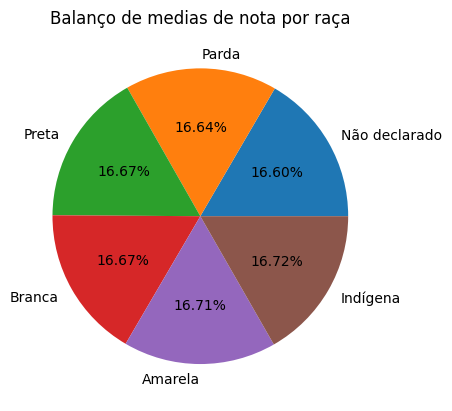

In [13]:


raca2 = arquivo["TP_COR_RACA"]
nota = arquivo["media_nota_soma"]

 

plt.title("Balanço de medias de nota por raça")
plt.pie(nota, labels=raca2, autopct="%1.2f%%")
plt.show()

Balanço de media de notas por raça. Grafico em barra 

Text(0, 0.5, 'Média notas')

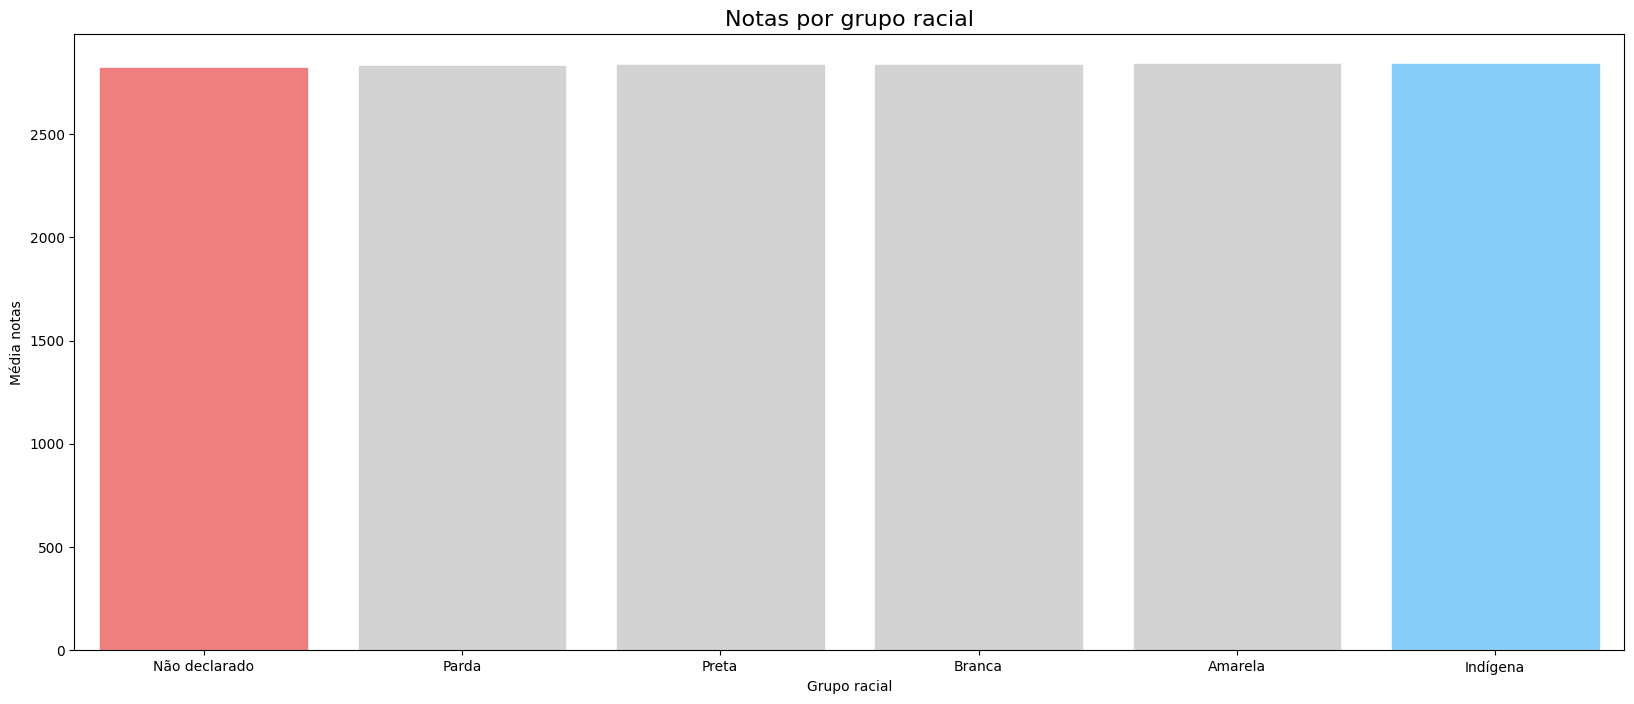

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))


sns.barplot(x=raça.index, y='media_nota_soma', data=raça, ax=ax)


raça_maior_media = raça.loc[raça['media_nota_soma'].idxmax()]


raça_menor_media = raça.loc[raça['media_nota_soma'].idxmin()]


for idx, bar in enumerate(ax.patches):
    if raça.index[idx] == raça_maior_media.name:
        bar.set_color('lightskyblue') 
    elif raça.index[idx] == raça_menor_media.name:
        bar.set_color('lightcoral')  
    else:
        bar.set_color('lightgray') 

ax.set_title("Notas por grupo racial", fontsize='16')
ax.set_xlabel('Grupo racial')
ax.set_ylabel('Média notas')

Media de notas por tipo de rendas

In [15]:
renda = dados.groupby('Q006').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

renda.rename(index={'A':'Zero Renda','B':'até RS1.1100','C':'De RS 1.100 até RS 1.650','D':'De RS 1.650 até RS 2.200','E':'De RS 2.200 até RS 2.750',
                          'F':'De RS 2.750 até RS 3.300','G':'De RS 3.300 até RS 4.400','H':'De RS 4.400 até RS 5.500',
                          'I':'De RS 5.500 até RS 6.600','J':'De RS 6.600 até RS 7.700','K':'De RS 7.700 até RS 8.800',
                          'L':'De RS 8.800 até RS 9.900','M':'De RS 9.900 até RS 11.000','N':'De RS 11.000 até RS 13.200',
                          'O':'De RS 13.200 até RS 16.500','P':'De RS 16.500 até RS 22.000','Q':'Acima de RS 22.000'}, inplace=True)

renda.to_excel('renda_media_notas.xlsx')
arquivo2 = pd.read_excel("renda_media_notas.xlsx")
display(arquivo2)


,Q006,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
0,Zero Renda,505.75,482.82,470.85,503.36,556.88,2519.66
1,até RS1.1100,514.62,495.28,474.46,513.39,594.00,2591.74
2,De RS 1.100 até RS 1.650,529.57,523.02,487.89,527.35,621.39,2689.23
3,De RS 1.650 até RS 2.200,539.27,541.37,497.88,534.85,640.25,2753.62
4,De RS 2.200 até RS 2.750,547.80,559.82,507.35,543.33,659.08,2817.38
5,De RS 2.750 até RS 3.300,556.82,578.54,517.52,549.06,678.64,2880.58
6,De RS 3.300 até RS 4.400,566.32,595.99,527.07,557.31,695.09,2941.78
7,De RS 4.400 até RS 5.500,573.74,615.96,540.61,563.27,716.20,3009.78
8,De RS 5.500 até RS 6.600,579.35,626.85,547.41,567.57,734.68,3055.86
9,De RS 6.600 até RS 7.700,585.68,641.02,555.13,572.93,738.56,3093.32


[Text(0.0, 0, 'Zero Renda'),
 Text(1.0, 0, 'até RS1.1100'),
 Text(2.0, 0, 'De RS 1.100 até RS 1.650'),
 Text(3.0, 0, 'De RS 1.650 até RS 2.200'),
 Text(4.0, 0, 'De RS 2.200 até RS 2.750'),
 Text(5.0, 0, 'De RS 2.750 até RS 3.300'),
 Text(6.0, 0, 'De RS 3.300 até RS 4.400'),
 Text(7.0, 0, 'De RS 4.400 até RS 5.500'),
 Text(8.0, 0, 'De RS 5.500 até RS 6.600'),
 Text(9.0, 0, 'De RS 6.600 até RS 7.700'),
 Text(10.0, 0, 'De RS 7.700 até RS 8.800'),
 Text(11.0, 0, 'De RS 8.800 até RS 9.900'),
 Text(12.0, 0, 'De RS 9.900 até RS 11.000'),
 Text(13.0, 0, 'De RS 11.000 até RS 13.200'),
 Text(14.0, 0, 'De RS 13.200 até RS 16.500'),
 Text(15.0, 0, 'De RS 16.500 até RS 22.000'),
 Text(16.0, 0, 'Acima de RS 22.000')]

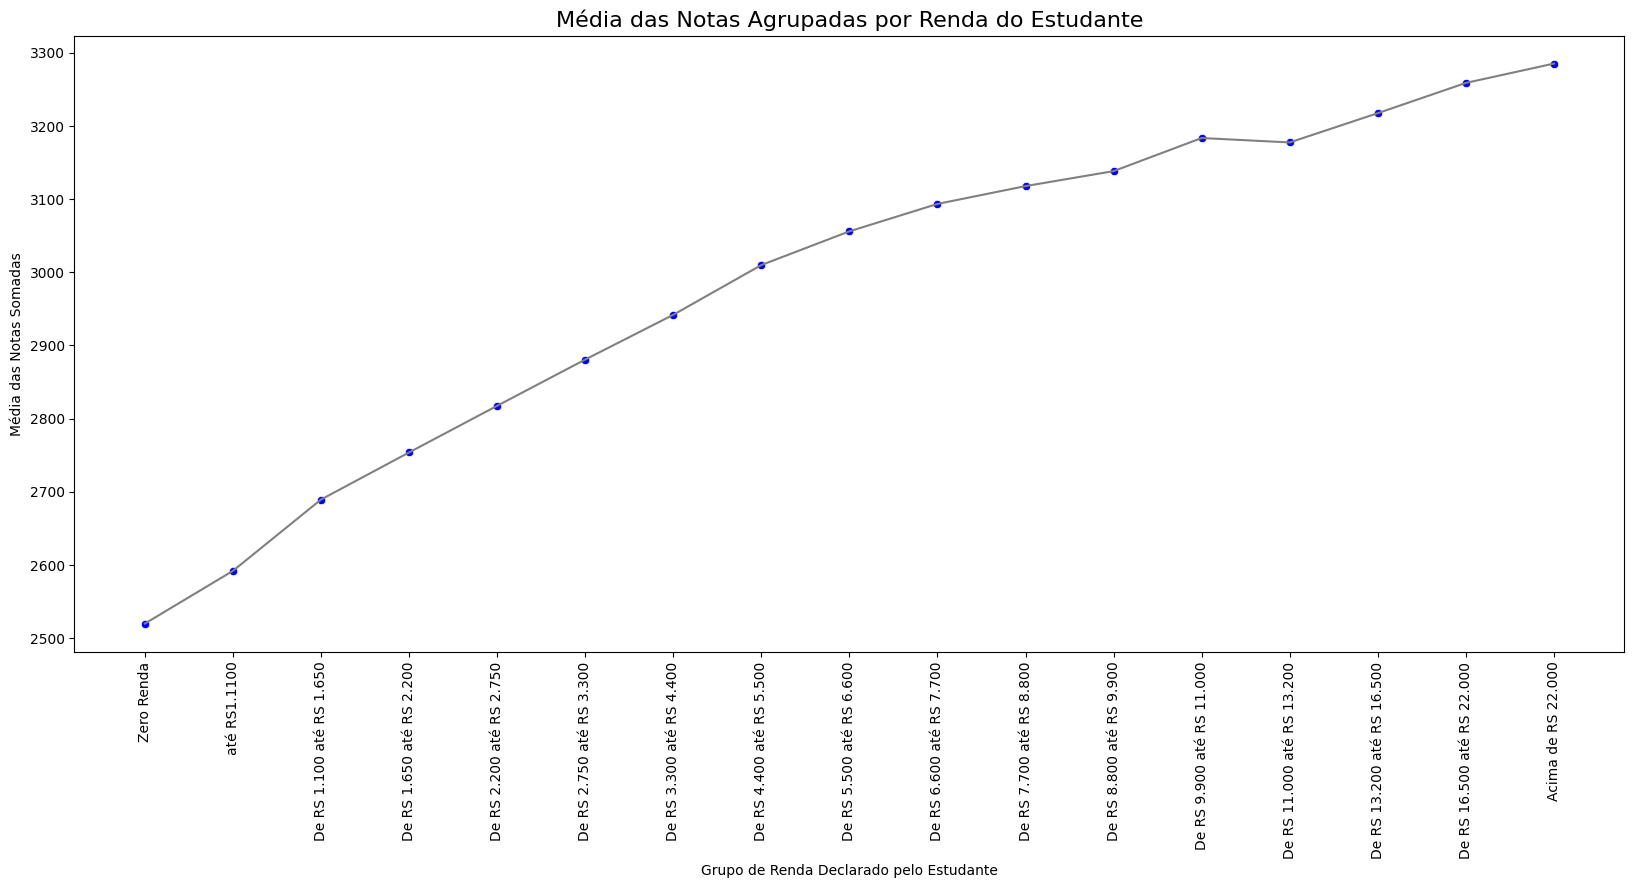

In [16]:

fig, ax = plt.subplots(figsize=(20, 8))


sns.lineplot(x=renda.index, y='media_nota_soma', data=renda, ax=ax, color='grey')


sns.scatterplot(x=renda.index, y='media_nota_soma', data=renda, ax=ax, color='blue', marker='o')

ax.set_title("Média das Notas Agrupadas por Renda do Estudante", fontsize='16')
ax.set_xlabel('Grupo de Renda Declarado pelo Estudante')
ax.set_ylabel('Média das Notas Somadas')



ax.set_xticks(renda.index)
ax.set_xticklabels(renda.index, rotation=90)



Media de nota por tipo de escola : pública / privada

In [17]:
escola = dados.groupby('TP_ESCOLA').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

escola.rename(index={1:'Não Respondeu',2:'Pública',3:'Privada'}, inplace=True)

escola.sort_values('media_nota_soma', ascending=True, inplace=True)
escola.to_excel('media_nota_por_tipo_escola.xlsx')
arquivo3 = pd.read_excel("media_nota_por_tipo_escola.xlsx")
display(arquivo3)


,TP_ESCOLA,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
0,Privada,544.15,557.67,508.24,539.93,648.52,2798.50
1,Pública,548.43,563.58,511.17,542.80,661.58,2827.56
2,Não Respondeu,549.51,565.04,512.22,542.93,663.04,2832.75


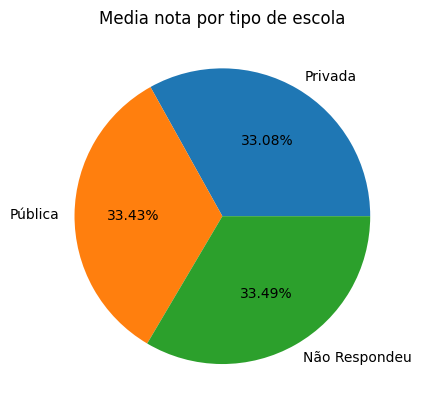

In [18]:
arquivo3 = pd.read_excel("media_nota_por_tipo_escola.xlsx")
escola = arquivo3["TP_ESCOLA"]
media = arquivo3["media_nota_soma"]

 

plt.title("Media nota por tipo de escola")
plt.pie(media, labels=escola, autopct="%1.2f%%")
plt.show()

Meida de nota por tipo de local : Rural / Urbano


In [19]:
local = dados.groupby('TP_LOCALIZACAO_ESC').agg(
    media_nota_ciencias_humanas = ('NU_NOTA_CH', 'mean'),
    media_nota_matematica = ('NU_NOTA_MT', 'mean'),
    media_nota_ciencias_da_natureza = ('NU_NOTA_CN', 'mean'),
    media_nota_linguagens_e_codigos = ('NU_NOTA_LC', 'mean'),
    media_nota_redacao = ('NU_NOTA_REDACAO', 'mean'),
    media_nota_soma = ('NU_NOTA_SOMA', 'mean'),
    ).round(2)

local.rename(index={1:'Urbana',2:'Rural'}, inplace=True)
local.sort_values('media_nota_soma', ascending=True, inplace=True)
local.to_excel('local.xlsx')
arquivo4 = pd.read_excel("local.xlsx")
display(arquivo4)



,TP_LOCALIZACAO_ESC,media_nota_ciencias_humanas,media_nota_matematica,media_nota_ciencias_da_natureza,media_nota_linguagens_e_codigos,media_nota_redacao,media_nota_soma
0,Urbana,532.96,547.9,499.49,532.67,632.50,2745.53
1,Rural,568.83,533.8,512.59,541.51,623.08,2779.81


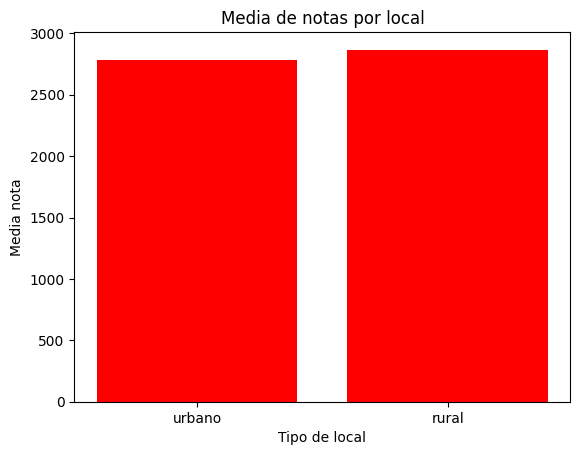

In [20]:
arquivo4 = pd.read_excel("local.xlsx")

import numpy as np

tipolocal = ['urbano', 'rural']
medianota = [2780.23, 2866.23]

plt.bar(tipolocal, medianota, color="red")

plt.xticks(tipolocal)

plt.ylabel('Media nota')
plt.xlabel('Tipo de local')
plt.title('Media de notas por local')
plt.show()
